# image analysis and synthesis

In [95]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [24]:
from skimage import io, util, feature
import numpy as np
from sklearn.ensemble import AdaBoostClassifier

In [114]:
import sys
#sys.maxsize
np.set_printoptions(threshold=1000)

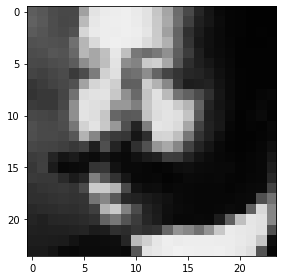

In [20]:
# show a image
i = 1
I = io.imread('imageface/train/pos/%05d.png'%i)
I = util.img_as_float(I)
io.imshow(I)

## Load data

In [115]:
# Train data
# X_train[0:3000] : positive
# X_train[3000:] : negative
X_train = np.empty([15000, 576], float)
y_train = np.ones(15000)
y_train[3000:] = -1
for i in range(3000):
    I = io.imread('imageface/train/pos/%05d.png'%(i+1))
    I = util.img_as_float(I)
    X_train[i] = I.flatten()
for i in range(12000):
    I = io.imread('imageface/train/neg/%05d.png'%(i+1))
    I = util.img_as_float(I)
    X_train[i+3000] = I.flatten()

In [116]:
# Test data
X_test = np.zeros((6256, 576))
for i in range(1000):
    I = io.imread('imageface/test/pos/%05d.png'%(i+1))
    X_test[i,:] = util.img_as_float(I).flatten()
for i in range(5256):
    I = io.imread('imageface/test/neg/%05d.png'%(i+1))
    X_test[i+1000,:] = util.img_as_float(I).flatten()
# Génération des labels d'apprentissage
y_test = np.concatenate((np.ones(1000), -np.ones(5256)))

## training

### Adaboost

In [136]:
## Adaboost 10 iteration
Adaboost = AdaBoostClassifier(n_estimators=10) 
Adaboost.fit(X_train , y_train)
TE = 1 - Adaboost.score(X_test, y_test)
print("Taux d'erreur 10 iterations: ", TE)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=10, random_state=None)

Taux d'erreur 10 iterations:  0.15920716112531974


In [137]:
## Adaboost 50 iteration
AdaBoost = AdaBoostClassifier(n_estimators=50) 
AdaBoost.fit(X_train , y_train)
TE_AdaBoost = 1 - AdaBoost.score(X_test, y_test)
print("Taux d'erreur 50 iterations: ", TE)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

Taux d'erreur 50 iterations:  0.13363171355498726


In [118]:
s_pred = clf.decision_function(X_test)

In [125]:
idx = np.argsort(s_pred)
idx = idx[::-1]

### KNN

In [141]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)
KNN = KNN.fit(X_train, y_train)
TE_KNN = 1 - KNN.score(X_test, y_test)
print("Taux d'erreur KNN: ", TE_KNN)

NotFittedError: This KNeighborsClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

### decision tree

In [154]:
from sklearn import tree
import graphviz

DT = tree.DecisionTreeClassifier()
DT = DT.fit(X_train, y_train)
TE_DT = 1 - DT.score(X_test, y_test)
print("Taux d'erreur Arbre de decision: ", TE_DT)

Taux d'erreur Arbre de decision:  0.17247442455242967


[Text(92.0127538514868, 214.0425, 'X[270] <= 0.363\ngini = 0.32\nsamples = 15000\nvalue = [12000, 3000]'),
 Text(22.553895297358455, 207.2475, 'X[270] <= 0.229\ngini = 0.095\nsamples = 4498\nvalue = [4272, 226]'),
 Text(10.715197501106795, 200.4525, 'X[575] <= 0.927\ngini = 0.034\nsamples = 2625\nvalue = [2580, 45]'),
 Text(8.475402134881206, 193.6575, 'X[73] <= 0.002\ngini = 0.029\nsamples = 2611\nvalue = [2572, 39]'),
 Text(7.157875448866153, 186.8625, 'X[11] <= 0.192\ngini = 0.49\nsamples = 7\nvalue = [3, 4]'),
 Text(6.6308647744601314, 180.0675, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(7.6848861232721735, 180.0675, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(9.792928820896257, 186.8625, 'X[287] <= 0.967\ngini = 0.027\nsamples = 2604\nvalue = [2569, 35]'),
 Text(8.738907472084216, 180.0675, 'X[49] <= 0.998\ngini = 0.025\nsamples = 2601\nvalue = [2568, 33]'),
 Text(8.211896797678195, 173.2725, 'X[468] <= 0.967\ngini = 0.024\nsamples = 2600\nvalue = [2568, 32]'),
 Text(

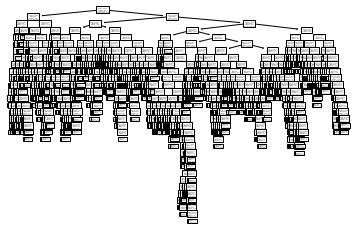

In [165]:
tree.plot_tree(DT)

In [162]:
dot_data = tree.export_graphviz(DT,out_file=None)
graph = graphviz.Source(dot_data)
graph

### Random Forest

In [166]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=10)
RF = DT.fit(X_train, y_train)
TE_RF = 1 - RF.score(X_test, y_test)
print("Taux d'erreur Arbre de decision: ", TE_RF)

Taux d'erreur Arbre de decision:  0.17503196930946296


### SVM

In [171]:
from sklearn import svm
SVM = svm.SVC()
SVM = SVM.fit(X_train, y_train)
TE_SVM = 1 - SVM.score(X_test, y_test)
print("Taux d'erreur SVM: ", TE_SVM)

Taux d'erreur SVM:  0.05786445012787722


## HOG
Histogram of Oriented Gradients

In [172]:
from skimage.feature import hog

array([0.23762395, 0.0317302 , 0.07558496, 0.        , 0.02665582,
       0.03796845, 0.0771854 , 0.07285148, 0.09316586, 0.23762395,
       0.1588905 , 0.11025311, 0.0504881 , 0.04747699, 0.0482679 ,
       0.05115879, 0.0288558 , 0.15345258, 0.06884824, 0.        ,
       0.        , 0.        , 0.0119767 , 0.        , 0.00577234,
       0.01281832, 0.0661091 , 0.14161155, 0.10408767, 0.09303951,
       0.12770351, 0.16510034, 0.05651849, 0.01092434, 0.09843933,
       0.09855049, 0.14543579, 0.15100789, 0.15025407, 0.08187182,
       0.15669222, 0.20936064, 0.14310938, 0.20369331, 0.15474759,
       0.18187641, 0.03828981, 0.0132065 , 0.00565793, 0.01610037,
       0.00073788, 0.02301286, 0.00052176, 0.08230596, 0.04471982,
       0.02777613, 0.01542004, 0.07304457, 0.06144029, 0.14337674,
       0.05696885, 0.07040914, 0.06350254, 0.15512241, 0.01179919,
       0.02461218, 0.15001512, 0.23762395, 0.09596983, 0.05834778,
       0.04642909, 0.20737258, 0.1466734 , 0.06083524, 0.23762

In [175]:
I = io.imread('imageface/train/pos/00003.png')
X = hog(I)
X.shape

(81,)

In [177]:
# Train data
# X_train[0:3000] : positive
# X_train[3000:] : negative
X_train_hog = np.empty([15000, 81], float)
y_train = np.ones(15000)
y_train[3000:] = -1
for i in range(3000):
    I = io.imread('imageface/train/pos/%05d.png'%(i+1))
    X_train_hog[i] = hog(I)
for i in range(12000):
    I = io.imread('imageface/train/neg/%05d.png'%(i+1))
    X_train_hog[i+3000] = hog(I)

In [179]:
# Test data
X_test_hog = np.zeros((6256, 81))
for i in range(1000):
    I = io.imread('imageface/test/pos/%05d.png'%(i+1))
    X_test_hog[i,:] = hog(I)
for i in range(5256):
    I = io.imread('imageface/test/neg/%05d.png'%(i+1))
    X_test_hog[i+1000,:] = hog(I)
# Génération des labels d'apprentissage
y_test = np.concatenate((np.ones(1000), -np.ones(5256)))

In [181]:
SVM = svm.SVC()
SVM = SVM.fit(X_train_hog, y_train)
TE_SVM_hog = 1 - SVM.score(X_test_hog, y_test)
print("Taux d'erreur SVM: ", TE_SVM_hog)

Taux d'erreur SVM:  0.02365728900255759
